In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [41]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.style.use('ggplot')
plt.style.use(['dark_background'])

font = {'family' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

from election import *

# Illinois

Hypergeometric with p of 0.55, n = 100

Text(0.5, 1.0, '1 Million Simulated Drawings of 100 Ballots')

/home/sfronczak/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sfronczak/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sfronczak/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


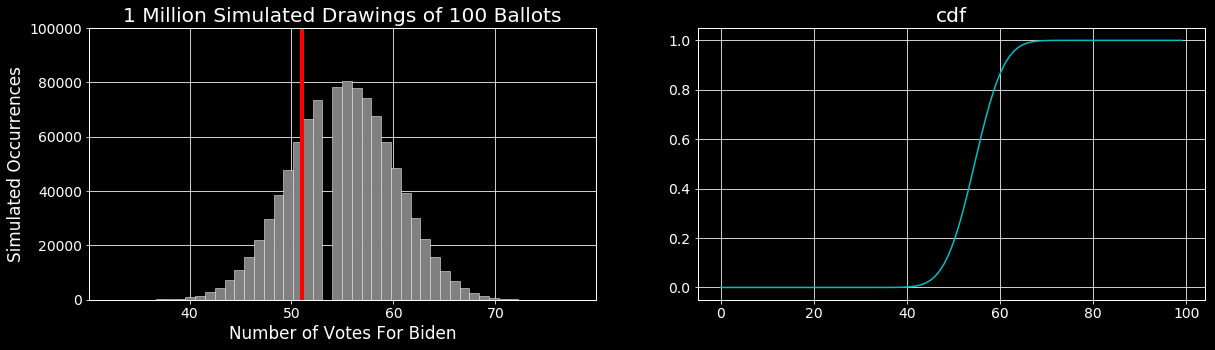

In [3]:
p_hat = 0.55
nsample = 1e2
m = Experiment(p_hat, nsample)
axes = m.plot_hypergeometric()
axes[0].axvline(nsample//2 +1, c='r',linewidth=4)
axes[0].set_xlabel('Number of Votes For Biden')
axes[0].set_ylabel('Simulated Occurrences')
axes[0].set_title('1 Million Simulated Drawings of 100 Ballots')

Text(0.5, 1.0, '1 Million Simulated Drawings of 1000 Ballots')

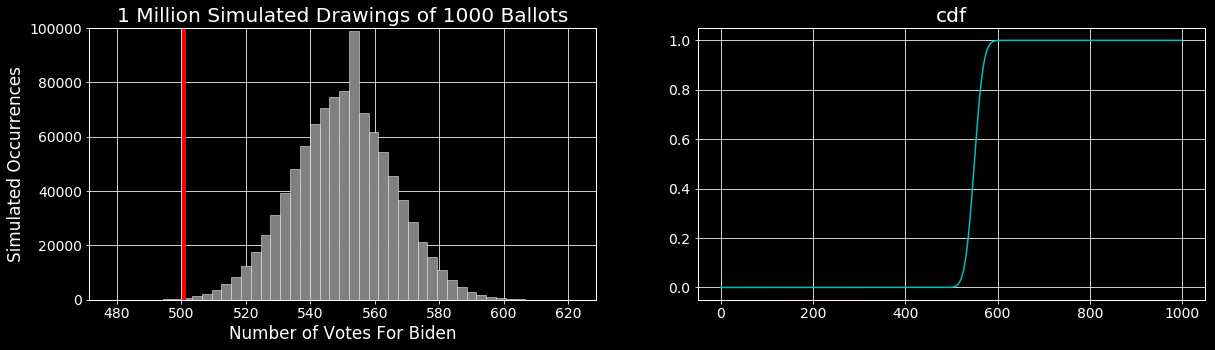

In [4]:
p_hat = 0.55
nsample = 1e3
m = Experiment(p_hat,nsample)
axes = m.plot_hypergeometric()
axes[0].axvline(nsample//2 +1, c='r',linewidth=4)
axes[0].set_xlabel('Number of Votes For Biden')
axes[0].set_ylabel('Simulated Occurrences')
axes[0].set_title('1 Million Simulated Drawings of 1000 Ballots')

X AXIS IS WRONG HERE

Text(0.5, 1.0, 'Probability on p (n = 100)')

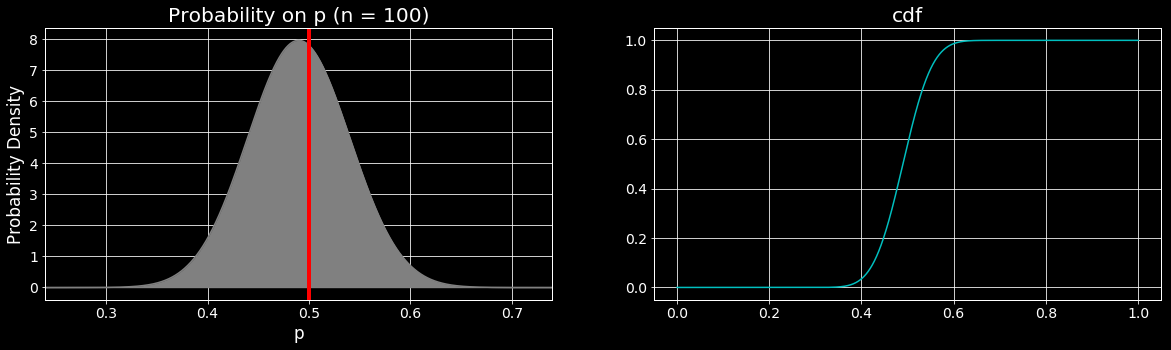

In [5]:
p_hat = 0.49
nsample = 1e2
m = Experiment(p_hat,nsample)
axes = m.plot_beta()
axes[0].axvline(0.5, c='r',linewidth=4)
axes[0].set_xlabel('p')
axes[0].set_ylabel('Probability Density')
axes[0].set_title('Probability on p (n = 100)')

(0.48878627157654914, 0.6112137284234509)

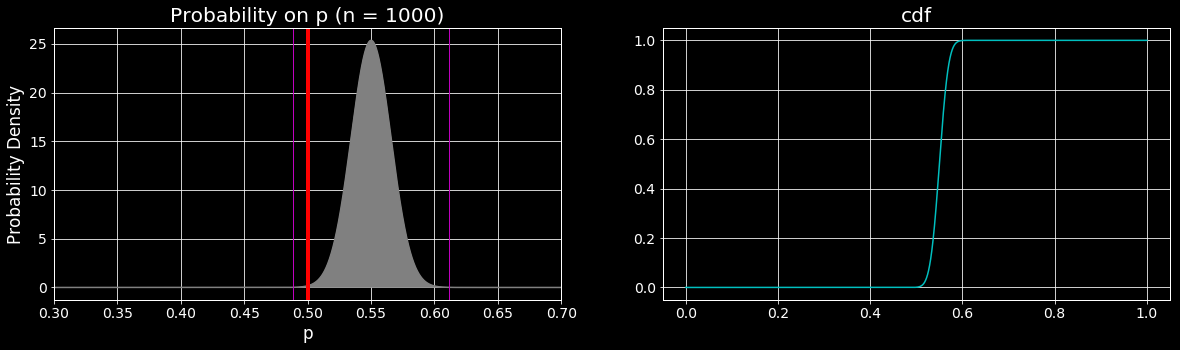

In [6]:
p_hat = 0.55
nsample = 1e3
m = Experiment(p_hat,nsample)
axes = m.plot_beta(xlims=[0.3,0.7])
high, low = calc_CI(p_hat,nsample)
for bound in [low,high]: axes[0].axvline(bound, c='m',linewidth=1)
axes[0].axvline(0.5, c='r',linewidth=4)
axes[0].set_xlabel('p')
axes[0].set_ylabel('Probability Density')
axes[0].set_title('Probability on p (n = 1000)')
low,high

(0.5306425194110908, 0.5693574805889093)

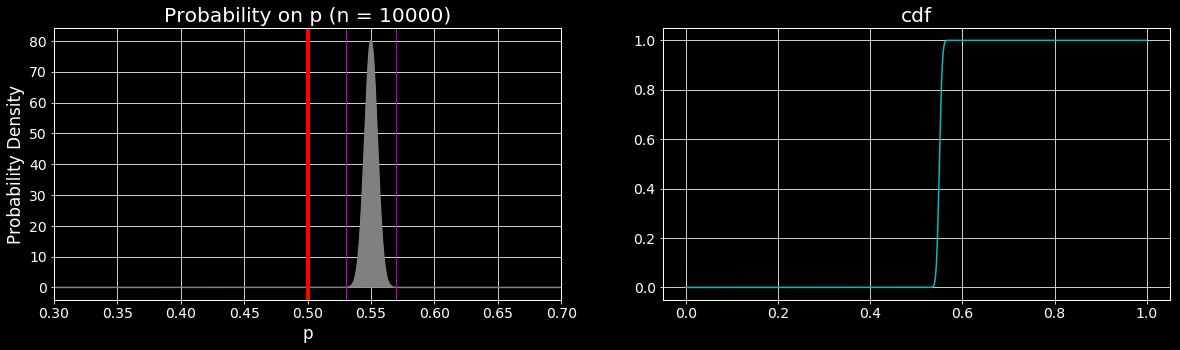

In [7]:
p_hat = 0.55
nsample = 1e4
m = Experiment(p_hat,nsample)
axes = m.plot_beta(xlims=[0.3,0.7])
axes[0].axvline(0.5, c='r',linewidth=4)
high, low = calc_CI(p_hat,nsample)
for bound in [low,high]: axes[0].axvline(bound, c='m',linewidth=1)
axes[0].set_xlabel('p')
axes[0].set_ylabel('Probability Density')
axes[0].set_title('Probability on p (n = 10000)')
low, high

# Virginia

In [8]:
with open('virginia.json') as json_file:
    data = json.load(json_file)

virginia_counties = []
cols = ['name', 'uid','princincts_reporting', 'n_princincts', 'updated', 'Biden', 'Trump', 'percent_Biden','percent_Trump']

for locality in data['Localities']:
    name = locality['Locality']['LocalityName']
    uid  = int(locality['Locality']['LocalityCode'])
    reporting = locality['PrecinctsReporting']
    nPrecincts = locality['PrecinctsParticipating']
    updated = locality['LastModified']
    # results of the candidates
    results = pd.DataFrame.from_dict(locality['Candidates'])
    biden = results.query('BallotName == "Joseph R. Biden"')
    trump = results.query('BallotName =="Donald J. Trump"')
    nBiden = biden.Votes.values[0]
    nTrump = trump.Votes.values[0]
    perBiden = biden.Percentage.values[0]
    perTrump = trump.Percentage.values[0]
    county_results = (name, uid, reporting, nPrecincts, updated, nBiden, nTrump, perBiden, perTrump)
    virginia_counties.append(county_results)
vir = pd.DataFrame(virginia_counties, columns= cols)
vir['total'] = vir.Biden + vir.Trump
for percent_column in ['percent_Biden','percent_Trump']:
    vir[percent_column] = vir[percent_column].str.rstrip('%').astype('float') / 100.0
vir.head()

,name,uid,princincts_reporting,n_princincts,updated,Biden,Trump,percent_Biden,percent_Trump,total
0,ACCOMACK COUNTY,1,17,17,2020-11-05T10:51:49.633,6835,8832,0.4307,0.5565,15667
1,ALBEMARLE COUNTY,3,31,31,2020-11-05T17:11:20.49,42078,20684,0.6561,0.3225,62762
2,ALEXANDRIA CITY,510,31,31,2020-11-04T18:32:18.393,65169,14251,0.8039,0.1758,79420
3,ALLEGHANY COUNTY,5,13,13,2020-11-04T13:55:30,2221,5842,0.2720,0.7156,8063
4,AMELIA COUNTY,7,6,6,2020-11-03T21:40:01.407,2390,5370,0.3045,0.6842,7760


In [85]:
vir.total.sum()

4259896

Text(0.5, 0, '')

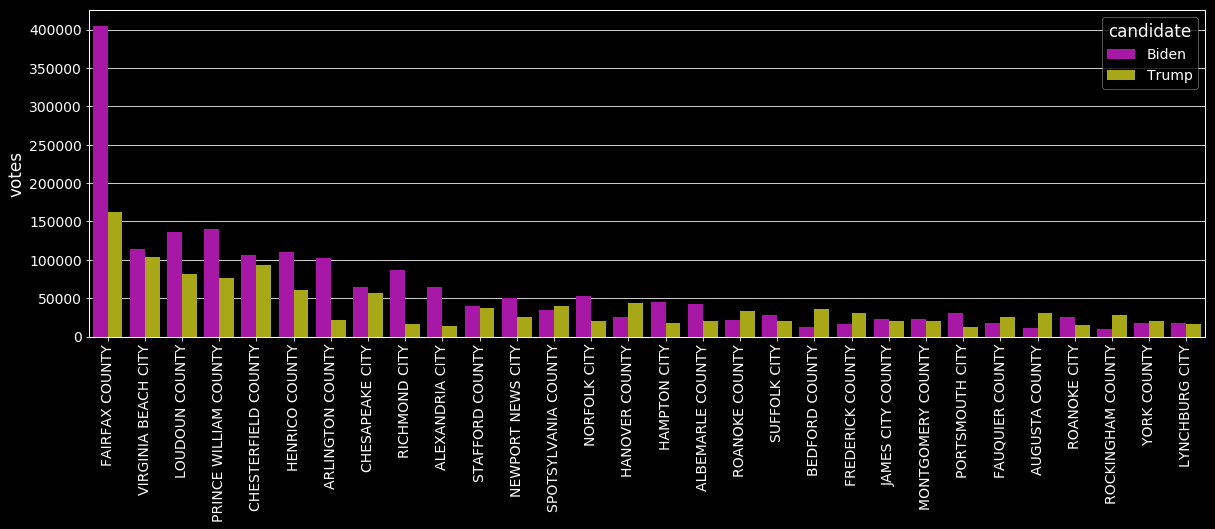

In [84]:
df = vir.sort_values('total',ascending=False).iloc[:30]

x = 'name'
y = 'votes'
hue = 'candidate'

melted_df = pd.melt(df[['Biden','Trump', x]], id_vars=[x],var_name=hue, value_name = y)

total

plt.figure(figsize=(20,6))
sns.barplot(x=x, y=y, hue=hue, data=melted_df, palette=['m','y'])
plt.xticks(rotation=90); plt.xlabel('')

In [10]:
vir['Biden10k'] = (vir.percent_Biden * 1e4).astype(int)
vir['Trump10k'] = (vir.percent_Trump * 1e4).astype(int)
vir.loc[vir.total < 1e4, 'Biden10k'] = vir.loc[vir.total < 1e4, 'Biden']
vir.loc[vir.total < 1e4, 'Trump10k'] = vir.loc[vir.total < 1e4, 'Trump']
vir.head()

,name,uid,princincts_reporting,n_princincts,updated,Biden,Trump,percent_Biden,percent_Trump,total,Biden10k,Trump10k
0,ACCOMACK COUNTY,1,17,17,2020-11-05T10:51:49.633,6835,8832,0.4307,0.5565,15667,4307,5565
1,ALBEMARLE COUNTY,3,31,31,2020-11-05T17:11:20.49,42078,20684,0.6561,0.3225,62762,6561,3225
2,ALEXANDRIA CITY,510,31,31,2020-11-04T18:32:18.393,65169,14251,0.8039,0.1758,79420,8039,1757
3,ALLEGHANY COUNTY,5,13,13,2020-11-04T13:55:30,2221,5842,0.2720,0.7156,8063,2221,5842
4,AMELIA COUNTY,7,6,6,2020-11-03T21:40:01.407,2390,5370,0.3045,0.6842,7760,2390,5370


Trump wins if we stop counting now

In [11]:
ten = vir.sum()
total = ten[['Biden10k','Trump10k']].sum()
ten[['Biden10k','Trump10k']]/total

Biden10k    0.4387
Trump10k    0.5613
dtype: object

Text(0.5, 0, '')

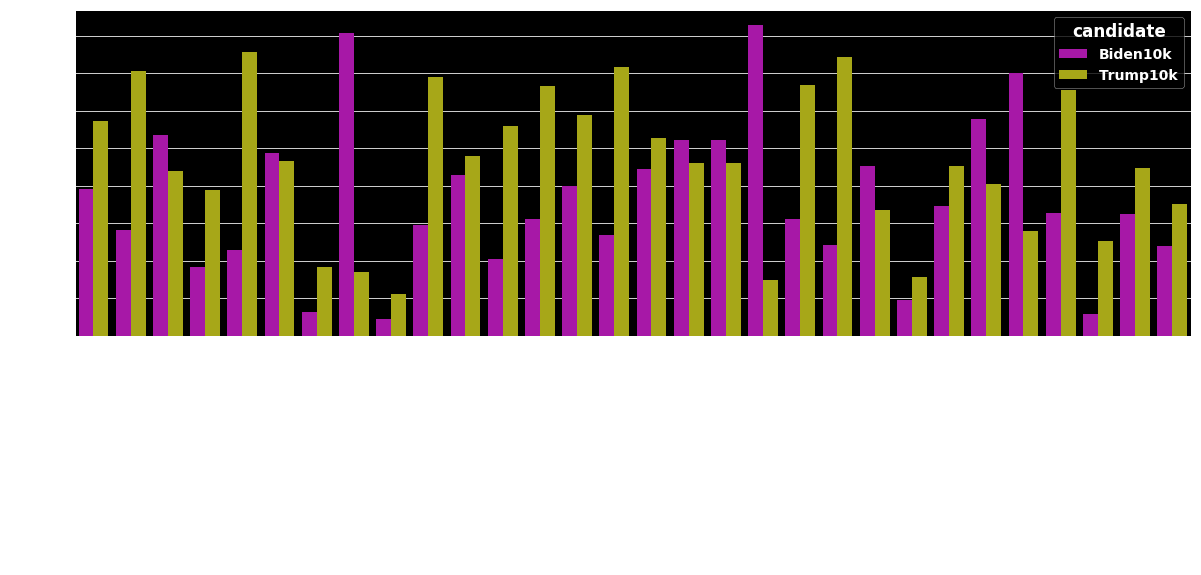

In [125]:
df2 = vir.sample(30)

x = 'name'
y = 'votes'
hue = 'candidate'

melted_df = pd.melt(df2[['Biden10k','Trump10k', x]], id_vars=[x],var_name=hue, value_name = y)

font = {'family' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

plt.figure(figsize=(20,6))
sns.barplot(x=x, y=y, hue=hue, data=melted_df, palette=['m','y'])
plt.xticks(rotation=90); plt.xlabel('')

/home/sfronczak/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


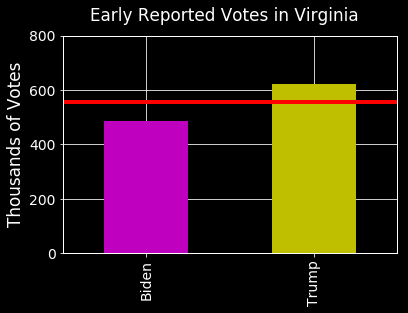

In [71]:
raw_results10k = vir.sum()[['Biden10k','Trump10k']]//1e3
raw_results10k.index = ['Biden','Trump']
raw_results10k.plot(kind='bar',colors=['m','y'])
total = raw_results10k.Biden + raw_results10k.Trump
# format some axes
plt.ylim([0,800]); plt.ylabel('Thousands of Votes')
plt.xlabel(''); plt.suptitle('Early Reported Votes in Virginia')
# win with over 50% line
to_win = (total * 0.5)
plt.axhline(to_win,c='r',linewidth=4)

Calculate the CI

In [12]:
# what is p_hat that biden wins for each county
vir['p_hat10k'] = vir.Biden10k / (vir.Trump10k + vir.Biden10k)
# calculate the CI
N = vir.Biden10k+vir.Trump10k
p = vir.p_hat10k
bounds = calc_CI(p, N) # from helper py file
bounds = pd.DataFrame(bounds,['p_high','p_low']).T
vir2 = pd.merge(vir,bounds,right_index=True,left_index=True)
vir2.head()

,name,uid,princincts_reporting,n_princincts,updated,Biden,Trump,percent_Biden,percent_Trump,total,Biden10k,Trump10k,p_hat10k,p_high,p_low
0,ACCOMACK COUNTY,1,17,17,2020-11-05T10:51:49.633,6835,8832,0.4307,0.5565,15667,4307,5565,0.436284,0.455706,0.416863
1,ALBEMARLE COUNTY,3,31,31,2020-11-05T17:11:20.49,42078,20684,0.6561,0.3225,62762,6561,3225,0.670448,0.688936,0.651959
2,ALEXANDRIA CITY,510,31,31,2020-11-04T18:32:18.393,65169,14251,0.8039,0.1758,79420,8039,1757,0.820641,0.835724,0.805559
3,ALLEGHANY COUNTY,5,13,13,2020-11-04T13:55:30,2221,5842,0.2720,0.7156,8063,2221,5842,0.275456,0.294814,0.256097
4,AMELIA COUNTY,7,6,6,2020-11-03T21:40:01.407,2390,5370,0.3045,0.6842,7760,2390,5370,0.307990,0.328381,0.287598


Make the predictions

In [73]:
# calculate raw numbers of votes predicted
vir2['predict_high'] = (vir2.p_high * vir2.total).astype(int)
vir2['predict_low'] = (vir2.p_low * vir2.total).astype(int)

# grab them after summing over the rows
high, low, total = vir2.sum()[['predict_high','predict_low', 'total']]

# combine into a dataframe after calculating the p as well
results = [(low, high, total),
           (f'{np.round(low/total*100,2)}%',f'{np.round(high/total*100,2)}%','NA')]
results = pd.DataFrame(results,index = ['Votes','Percent'],columns = ['Low Estimate','High Estimate','Total Virginia Votes'])
results

,Low Estimate,High Estimate,Total Virginia Votes
Votes,2255589,2413635,4259896
Percent,52.95%,56.66%,NA


Or lets display it as a a bar chart. What statistician sees

,Biden,Trump
low,2.255589,2.004307
high,2.413635,1.846261


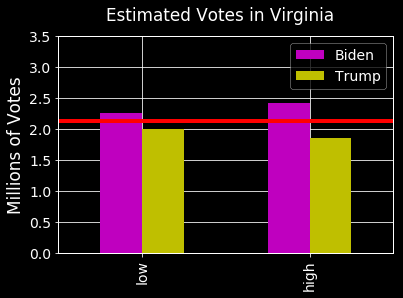

In [80]:
combined = [(low, high),
           (total-low, total-high)]
combined = pd.DataFrame(combined,index = ['Biden','Trump'], columns = ['low','high']).T/1000000
# plot bars
combined.plot(kind='bar',color=['m','y'])
# format some axes
plt.ylim([0,3.5]); plt.ylabel('Millions of Votes')
plt.xlabel(''); plt.suptitle('Estimated Votes in Virginia')
# win with over 50% line
to_win = (total * 0.5)/ 1e6
plt.axhline(to_win,c='r',linewidth=4)
combined

In [45]:
to_win

2129948.0

In [40]:
melted_df = pd.melt(combined, id_vars=['p_low','p_high'],var_name='votes', value_name = 'candidate')
plt.figure(figsize=(20,6))
sns.barplot(x='candidate', y='votes', hue='candidate', data=melted_df, palette=['m','y'])
plt.xticks(rotation=90); plt.xlabel('')
melted_df

ValueError: min() arg is an empty sequence

<Figure size 1440x432 with 0 Axes>

beta function, find alpha and beta as a function n and p https://www.real-statistics.com/binomial-and-related-distributions/beta-distribution/

Visually inspecting validity of normal approx for binomial and hypergeometric (could be its own blog honestly)

Text(0.5, 0.98, 'Normal Approx on Binary')

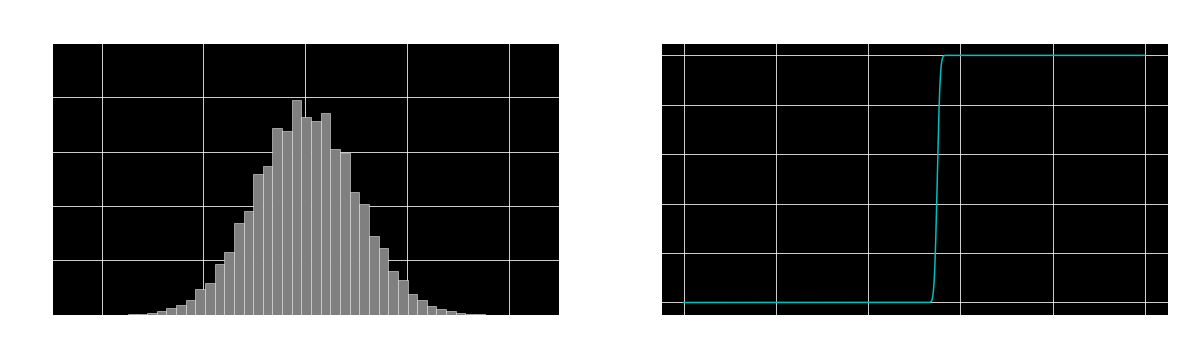

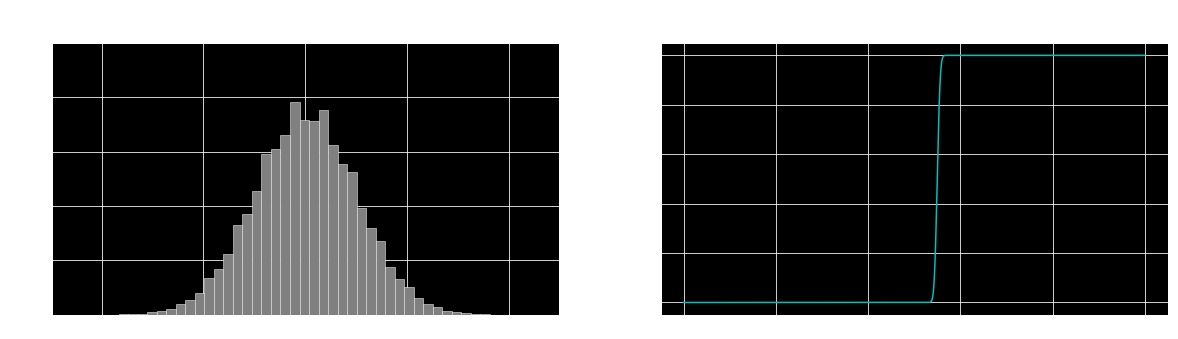

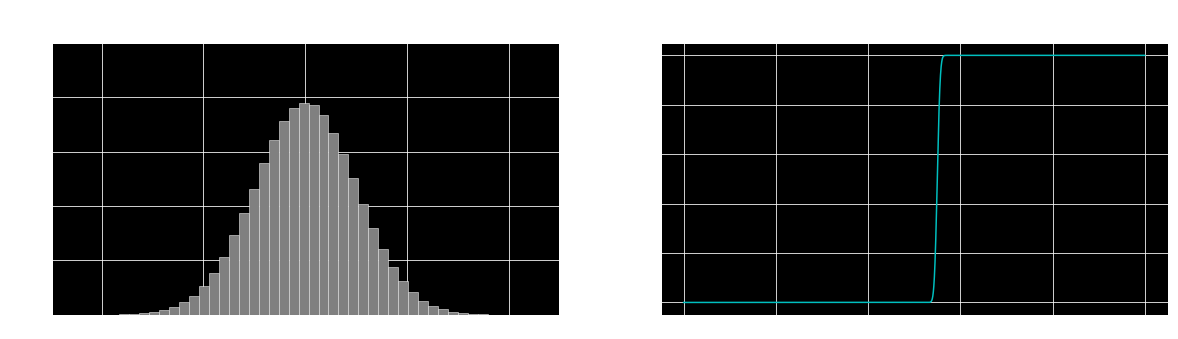

In [16]:
p_hat = 0.55
nsample = 1e4
m = Experiment(p_hat,nsample)

m.plot_hypergeometric()
plt.suptitle('hypergeometric')

m.plot_binomial()
plt.suptitle('Binomial')

m.plot_normal_approx_bin()
plt.suptitle('Normal Approx on Binary')

And then the same for the Beta-binomial

Text(0.5, 0.98, 'Normal Approx on Beta')

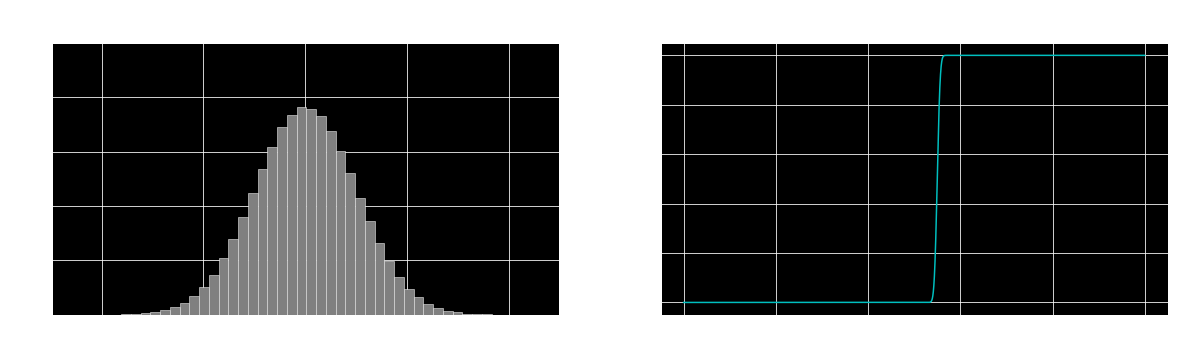

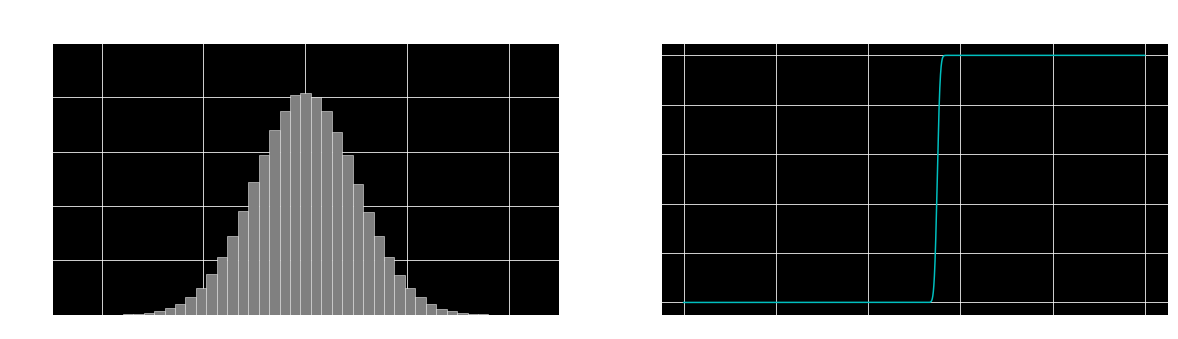

In [17]:
m.plot_beta()
plt.suptitle('Beta')

m.plot_normal_approx_beta()
plt.suptitle('Normal Approx on Beta')

z scores for high Confidences for normal dist https://www.calculator.net/confidence-interval-calculator.html. Note that I'll use this and then we're less than 0.001 chance of being wrong or something

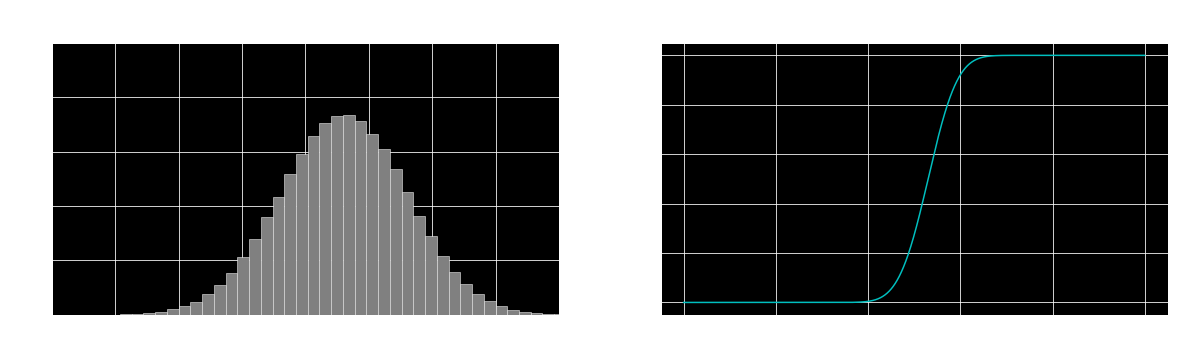

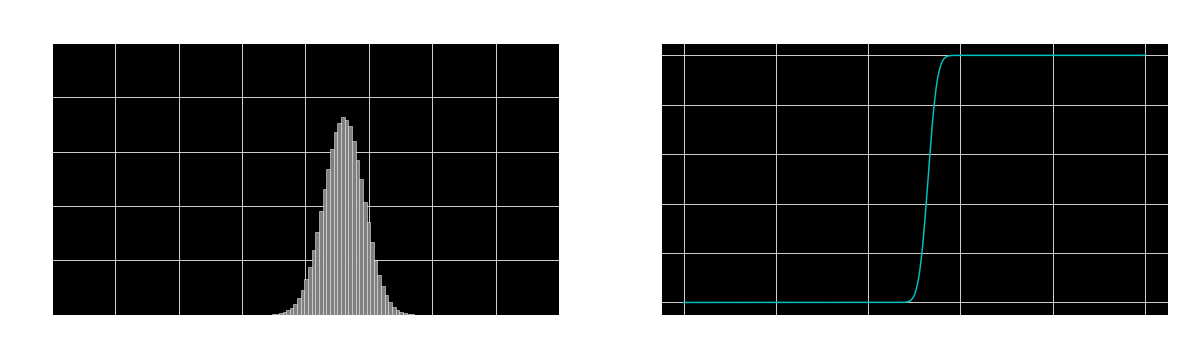

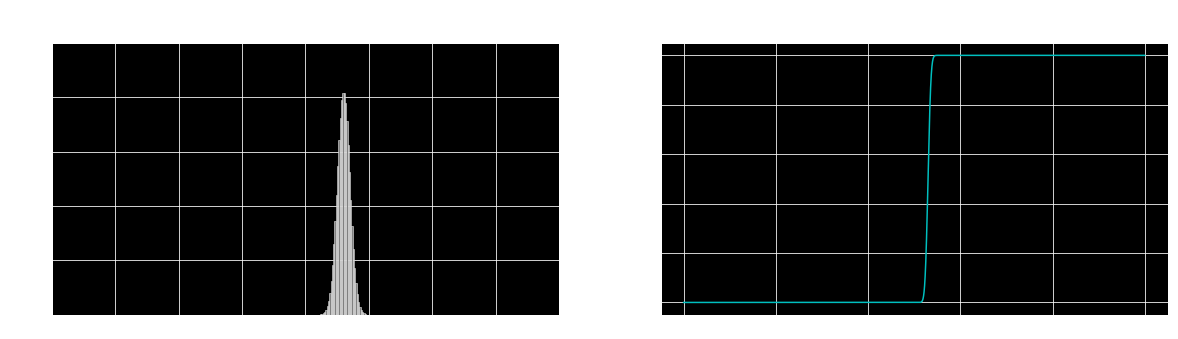

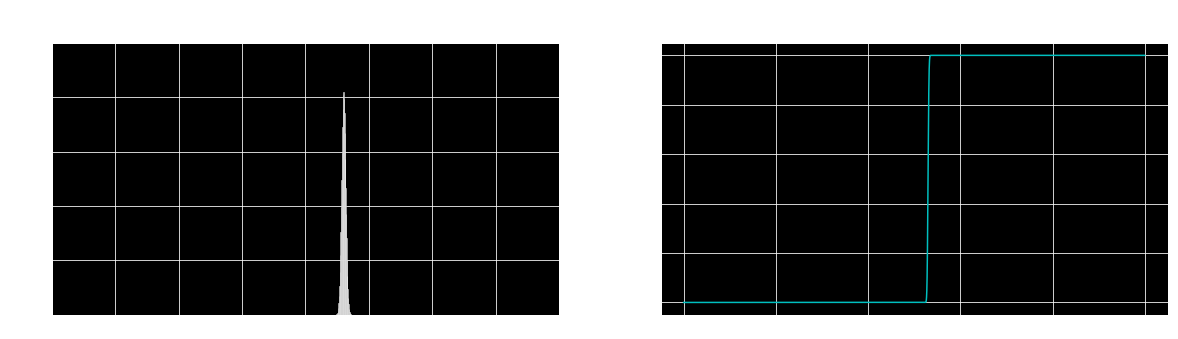

In [18]:
p_hat = 0.53

for nsample in [1e2, 1e3, 1e4, 1e5]:
    m = Experiment(p_hat, nsample)
    m.plot_beta(xlims=[0.3,0.7])
    plt.suptitle(f'Beta with p_hat of {p_hat} and n = {int(nsample)}')